In [65]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.cm import viridis

In [66]:
# Load actual and predicted data from CSV files
actual_data = pd.read_csv('/content/test.csv')
predicted_data = pd.read_csv('/content/openapi.csv')

In [67]:
actual_data.head()

,Data,Label
0,"কর্মক্ষেত্রে নারীর অংশগ্রহণ, কাজের পরিবেশ, মজু...",1.0
1,"এই বেটির বাবা টা যদি ধর্ষক না হইতো,তাহলে আজকে ...",2.0
2,মানুষ সুন্দর চেহারাকে কুৎসিত চেহারাই কিভাবে উপ...,2.0
3,ডাক্তারি পড়লে মেয়েকে ভালো বিয়ে দেয়া যাবে,2.0
4,কাউকে মেরে ফেলার ব্যাপারে সরকারের পদক্ষেপের পে...,0.0


In [68]:
predicted_data.head()

,Data,Predicted_output
0,"কর্মক্ষেত্রে নারীর অংশগ্রহণ, কাজের পরিবেশ, মজু...",2
1,"এই বেটির বাবা টা যদি ধর্ষক না হইতো,তাহলে আজকে ...",2
2,মানুষ সুন্দর চেহারাকে কুৎসিত চেহারাই কিভাবে উপ...,0
3,ডাক্তারি পড়লে মেয়েকে ভালো বিয়ে দেয়া যাবে,1
4,কাউকে মেরে ফেলার ব্যাপারে সরকারের পদক্ষেপের পে...,0


In [69]:
actual_data.shape

(987, 2)

In [70]:
predicted_data.shape

(987, 2)

In [71]:
actual_data['Label'].value_counts()

2.0    375
1.0    306
0.0    300
Name: Label, dtype: int64

In [72]:
predicted_data['Predicted_output'].value_counts()

2    387
0    316
1    284
Name: Predicted_output, dtype: int64

In [73]:
merged_data = pd.merge(actual_data, predicted_data, on='Data')

In [74]:
merged_data.head()

,Data,Label,Predicted_output
0,"কর্মক্ষেত্রে নারীর অংশগ্রহণ, কাজের পরিবেশ, মজু...",1.0,2
1,"এই বেটির বাবা টা যদি ধর্ষক না হইতো,তাহলে আজকে ...",2.0,2
2,মানুষ সুন্দর চেহারাকে কুৎসিত চেহারাই কিভাবে উপ...,2.0,0
3,ডাক্তারি পড়লে মেয়েকে ভালো বিয়ে দেয়া যাবে,2.0,1
4,কাউকে মেরে ফেলার ব্যাপারে সরকারের পদক্ষেপের পে...,0.0,0


In [75]:
correct_predictions = (merged_data['Label'] == merged_data['Predicted_output']).sum()
total_predictions = len(merged_data)
accuracy = correct_predictions / total_predictions

print("Accuracy:", accuracy)


Accuracy: 0.5419615773508595


###Confusion Matrix

In [76]:
missing_values = merged_data.isnull().sum()
missing_values

Data                0
Label               6
Predicted_output    0
dtype: int64

In [77]:
merged_data = merged_data.dropna()

In [78]:
conf_matrix = confusion_matrix(merged_data['Label'], merged_data['Predicted_output'])

In [84]:
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

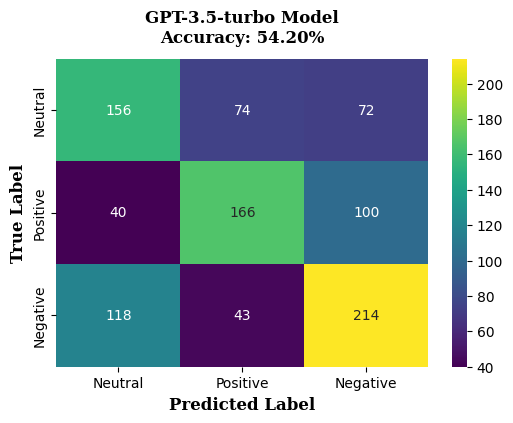

In [95]:
accuracy_percentage = accuracy*100
# Create a DataFrame from the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Neutral', 'Positive', 'Negative'],
                              index=['Neutral', 'Positive', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label',fontdict=font)
plt.ylabel('True Label',fontdict=font)
plt.title('GPT-3.5-turbo Model\nAccuracy: {:.2f}%'.format(accuracy_percentage),
                  fontdict=font, pad=12)
plt.show()

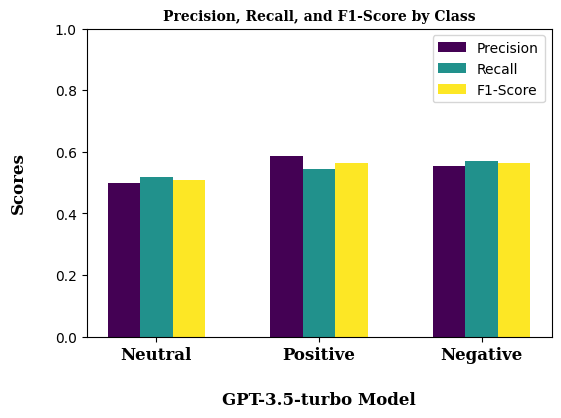

In [90]:
from matplotlib.cm import viridis
# Example confusion matrix and classification report (replace with your actual data)
y_true = merged_data['Label']
y_pred = merged_data['Predicted_output']

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate classification report
report = classification_report(y_true, y_pred, output_dict=True)

# Extract class labels
classes = list(report.keys())[:-3]  # Removing 'micro avg', 'macro avg', 'weighted avg' keys

# Map class labels to specific categories
class_labels = []
for class_label in classes:
    if class_label == "0.0":
        class_labels.append('Neutral')
    elif class_label == "1.0":
        class_labels.append('Positive')
    elif class_label == "2.0":
        class_labels.append('Negative')

# Extract precision, recall, f1-score, and support from the classification report
precision = [report[class_label]['precision'] for class_label in classes]
recall = [report[class_label]['recall'] for class_label in classes]
f1_score = [report[class_label]['f1-score'] for class_label in classes]
support = [report[class_label]['support'] for class_label in classes]

x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

colors = viridis(np.linspace(0, 1, 3))

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width, precision, width, label='Precision', color=colors[0])
rects2 = ax.bar(x, recall, width, label='Recall', color=colors[1])
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color=colors[2])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores',fontdict=font,labelpad=20)
ax.set_title('Precision, Recall, and F1-Score by Class',fontdict=font2)
ax.set_xticks(x)
ax.set_xticklabels(class_labels,fontdict=font)  # Use modified class labels
ax.legend()
ax.set_ylim(0, 1.0)
plt.xlabel('GPT-3.5-turbo Model', fontdict=font,labelpad=20)


plt.show()
